In [4]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/theleadio/datascience_demo/master/tripadvisor_hotel_reviews.csv')

In [7]:
df.sample(5)

,Review,Rating
17048,excellent location wife stayed b roppongi 6 ni...,5
8316,great hotel suggest great location. city cente...,4
17476,small comfortable lodging staff n't friendlies...,4
11539,great place stay stopped husa oriente 11/01/08...,4
13377,not worth price let bottm line not worth 350 e...,2


<AxesSubplot:xlabel='Rating', ylabel='count'>

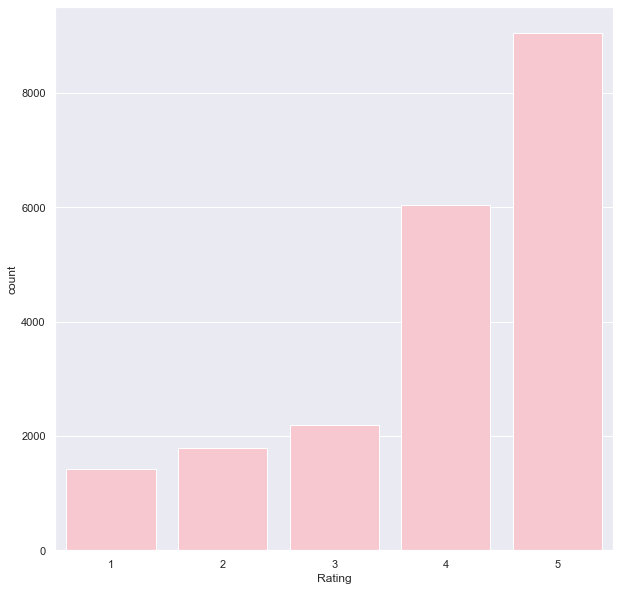

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(data=df, x='Rating', color='pink')

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
def wordcloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show() 

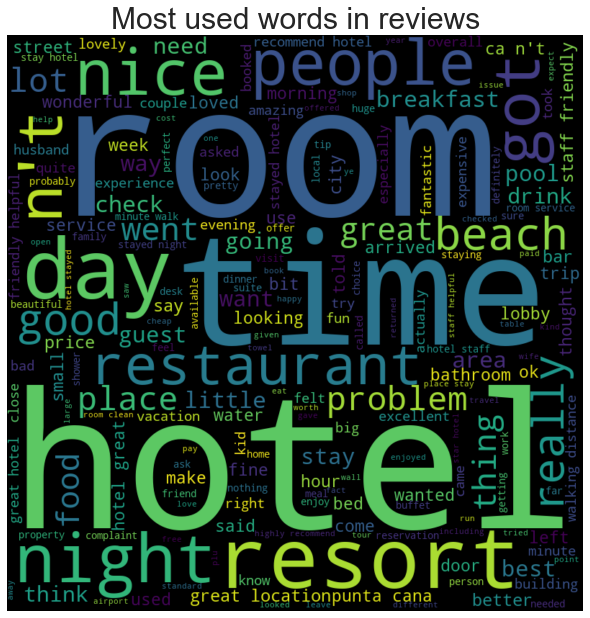

In [12]:
wordcloud_generator(df['Review'], title="Most used words in reviews")

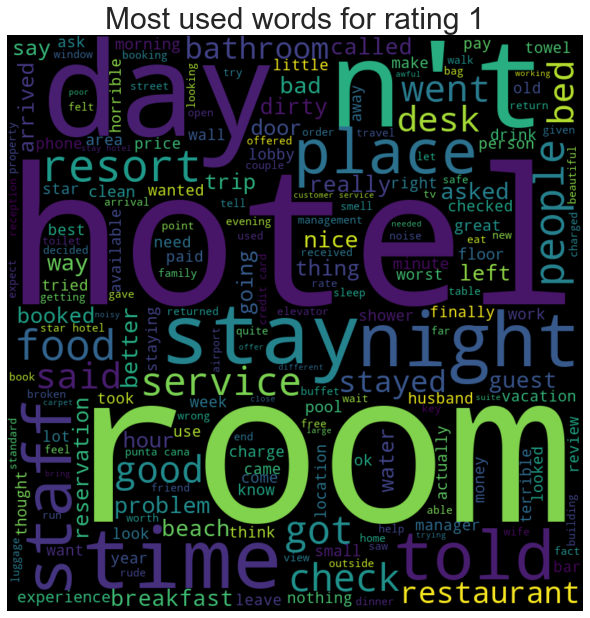

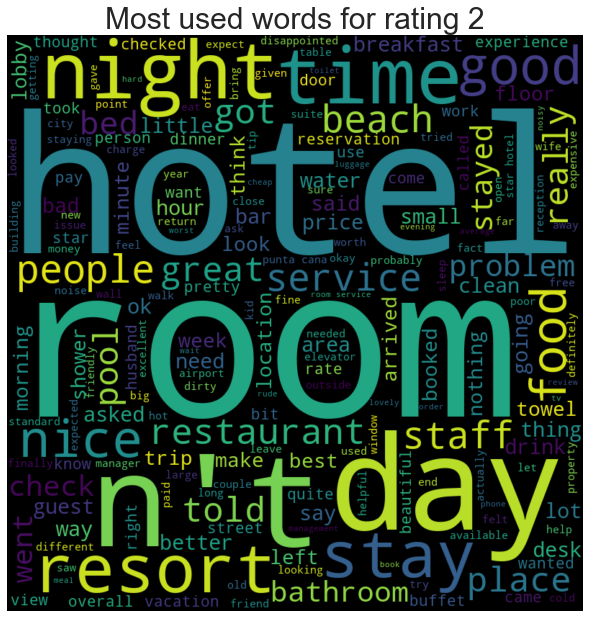

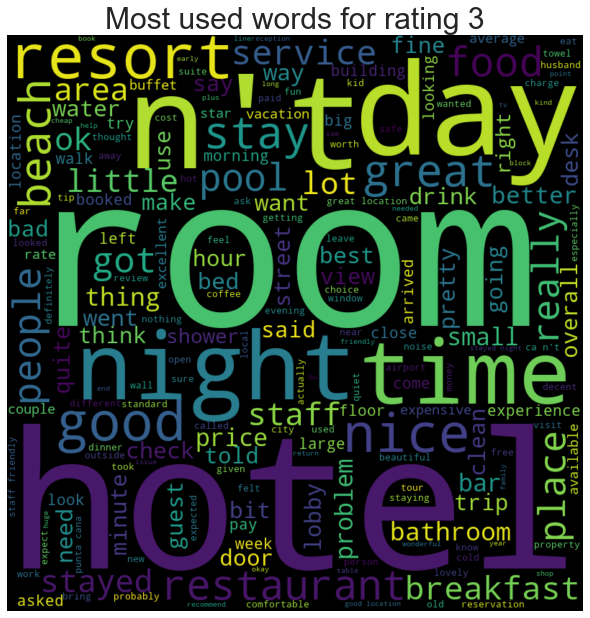

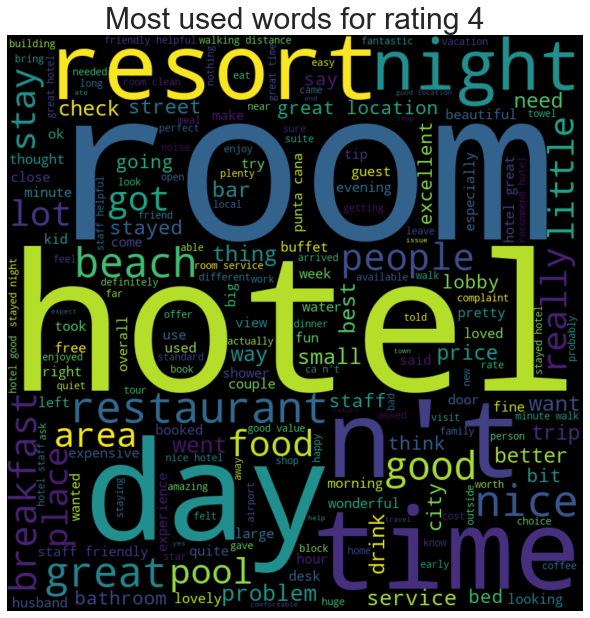

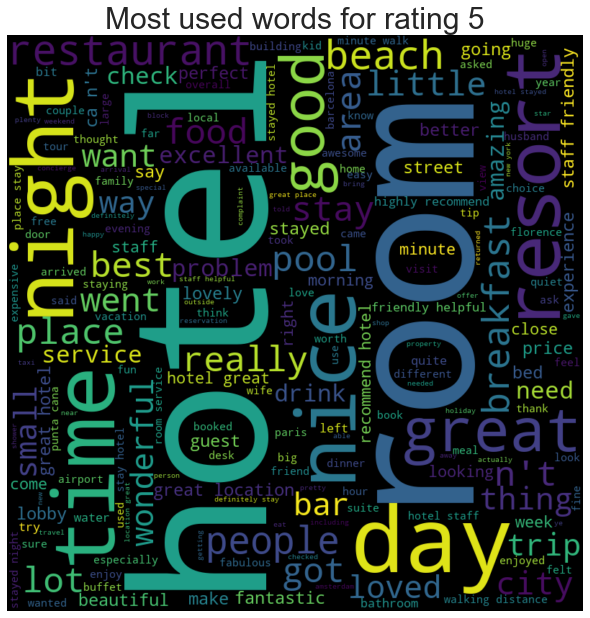

In [13]:
for rating in range(1, 6):
    reviews = df[df['Rating'] == rating]
    wordcloud_generator(reviews['Review'], title="Most used words for rating " + str(rating))

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
feature = tfidf.fit_transform(df['Review'])

In [15]:
query = "rude"
queryTFIDF = tfidf.transform([query])

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

cosims = cosine_similarity(queryTFIDF, feature).flatten()

In [17]:
results = cosims.argsort()[:-6:-1]

In [18]:
print(f'Query = {query}\n')

for r in results:
    print(df.iloc[r]['Rating'])
    print(df.iloc[r]['Review'])
    print("---------------------------")

Query = rude

1
terribly rude service, second time stayed hotel time months ago rude lady reception checked just rude patronising, not nice welcome, bar man steve extremely rude service worst experienced bar and/or hotel world, not stay time definitely book intercontinental spent time told langham concierge stopped serving dinner drinks evening, intercontinental dream tried change hotels no space,  
---------------------------
1
rude desk manager place ridiculous, 89.99 hotel smells old dirt customer service rude, hotel not airport reported given room bedbugs room, complained lady did best desk asked speak management rude told nothing change room, nice job bites,  
---------------------------
3
decent hotel poor location price good room far stay, staff desk rude/condescending,  
---------------------------
2
love hate rooms nice newly renovated clean, night got room slightly used, trash bed askew towel used, not sure, parking challenge early leave keys hotel staff, elevator old slow no

In [19]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello World !' + color.END)

Hello World !


In [23]:
query = ["rude","problem","service","dirty","price"]

for x in query:
    queryTFIDF = tfidf.transform([x])
    cosims = cosine_similarity(queryTFIDF, feature).flatten()
    results = cosims.argsort()[:-6:-1]

    print(color.BOLD + f'Query = {x}\n'+ color.END)

    for r in results:
        print(df.iloc[r]['Rating'])
        print(df.iloc[r]['Review'])
        print("---------------------------")
    
    print("\n")

Query = rude

1
terribly rude service, second time stayed hotel time months ago rude lady reception checked just rude patronising, not nice welcome, bar man steve extremely rude service worst experienced bar and/or hotel world, not stay time definitely book intercontinental spent time told langham concierge stopped serving dinner drinks evening, intercontinental dream tried change hotels no space,  
---------------------------
1
rude desk manager place ridiculous, 89.99 hotel smells old dirt customer service rude, hotel not airport reported given room bedbugs room, complained lady did best desk asked speak management rude told nothing change room, nice job bites,  
---------------------------
3
decent hotel poor location price good room far stay, staff desk rude/condescending,  
---------------------------
2
love hate rooms nice newly renovated clean, night got room slightly used, trash bed askew towel used, not sure, parking challenge early leave keys hotel staff, elevator old slow no